<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS231_2024/blob/main/very_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Add this to the beginning of your script to create your dataset.
student_id = 201515394 #here you need to change this number for your student ID
import requests
r = requests.get('https://raw.githubusercontent.com/flowonthegoliv/ENVS231_2022/main/make_data.py')
with open('make_data.py', 'w') as f:
    f.write(r.text)
import make_data
datetime, dat1, dat2, dat3 = make_data.make_data(student_id)


In [3]:
import numpy as np
dat1.shape

(43821,)

In [9]:
#first we will compute the statistics
import numpy as np

#https://numpy.org/doc/stable/reference/routines.statistics.html

mean1 = np.nanmean(dat1);
print(np.round(mean1,3))
std1 = np.nanstd(dat1);
print(np.round(std1,3))
med1 = np.nanmedian(dat1);
max1 = np.nanmax(dat1);
min1 = np.nanmin(dat1);
var1 = np.nanvar(dat1);

p5 = np.nanpercentile(dat1,5)
p95 = np.nanpercentile(dat1,95)


8.07
7.795


Next we are manually going to make a histogram -- so lets think how we would do this. There is a span of 7 so that means we need 8 points right? Think of a set of fence posts for two fence pannels (n + 1 ) always...

In [22]:
#here we create out span -- this will be a space from the min to the mac
span = np.linspace(min1,max1,8)

# print(min1)
# print(max1)
# print(span)

count = np.zeros([7,])
#here we are going to create a loop -- just think a bit to how you did this at primary school with counters and grouping.

for i in range(0,7):
  count[i]=sum(np.logical_and(dat1>=span[i],dat1<span[i+1]))
# count

# print(span)

[ -4.8         22.75714286  50.31428571  77.87142857 105.42857143
 132.98571429 160.54285714 188.1       ]


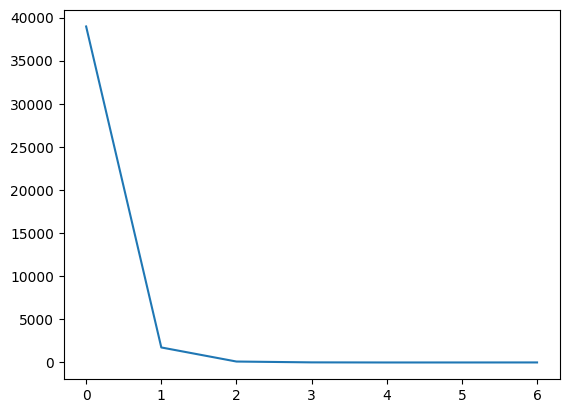

In [24]:
import matplotlib.pyplot as plt

plt.plot(count)

In [25]:
#but what would the axis be? Lets think of the fence pannel again right -- its in the middle...

bins = np.zeros([7,])
for i in range(0,7):
  bins[i]=(span[i]+span[i+1])/2
print(bins)



[  8.97857143  36.53571429  64.09285714  91.65       119.20714286
 146.76428571 174.32142857]


In [26]:
#how about in a simple table:

# Define the headers
headers = ["Bins", "Count"]
# Print the headers
print(f"| {' | '.join(headers)} |")
# Print the separator
print(f"| {'-' * len(headers[0])} | {'-' * len(headers[1])} |")
# Print the data rows
for i in range(len(bins)):
    print(f"| {bins[i]}{' ' * (len(headers[0]) - len(str(bins[i])))} | {count[i]}{' ' * (len(headers[1]) - len(str(count[i])))} |")

| Bins | Count |
| ---- | ----- |
| 8.978571428571428 | 38966.0 |
| 36.535714285714285 | 1744.0 |
| 64.09285714285716 | 110.0 |
| 91.65 | 13.0  |
| 119.20714285714286 | 1.0   |
| 146.7642857142857 | 2.0   |
| 174.32142857142856 | 5.0   |


Text(0.5, 1.0, 'title')

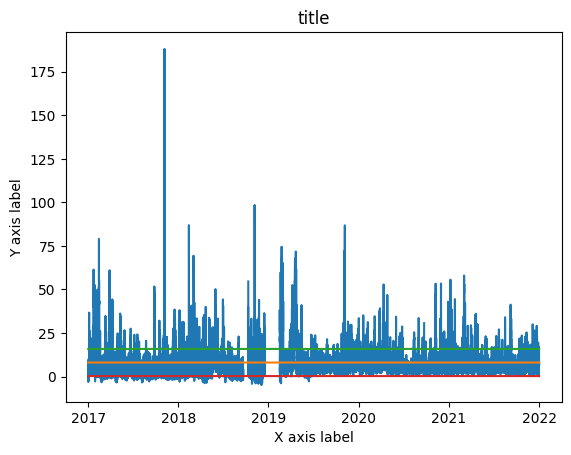

In [29]:
import matplotlib.pyplot as plt

plt.plot(datetime,dat1)
plt.plot(datetime,mean1*np.ones(len(datetime)))
plt.plot(datetime,mean1+std1*np.ones(len(datetime)))
plt.plot(datetime,mean1-std1*np.ones(len(datetime)))

plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.title("title")



Text(0.5, 1.0, 'title')

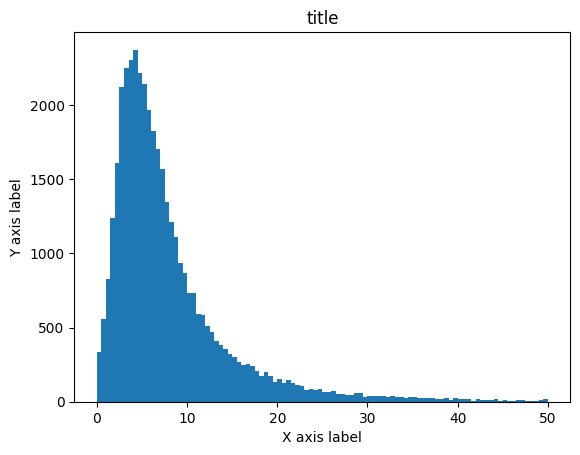

In [30]:
data = dat1[~np.isnan(dat1)]
plt.hist(data,bins=100,range=[0,50])
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.title("title")